# Instalación

**Los datos necesarios para realizar la práctica están en una carpeta compartida que se llama `data`, situada en "Shared with me". Para que el cuaderno pueda acceder a ella es necesario crear un link en "My Drive". El link se crea simplemente seleccionando "data", y desde el menu del botón derecho seleccione "Add a shortcut to Drive".**

**Una vez hecho esto, ejecute la siguiente celda. Esta celda montará el directorio de trabajo del cuaderno y verá la carpeta `data` a través del link. Para montar el directorio le pedirá que se registre en "Drive"**.

In [ ]:
## Instalación: esta celda monta el directorio de trabajo
if 'google.colab' in str(get_ipython()):
    # Setup colab
    from google.colab import drive
    drive.mount('/drive')
    %cd /drive/My Drive/data
else:
    pass

# Entrenamiento

En esta práctica se analiza el proceso de entrenamiento (o aprendizaje) de una red neuronal y se evalúa su resultado. Hasta ahora hemos aprendido a construir redes totalmente conectadas mediante pilas de capas "densas". Como se ha visto, cuando se crea por primera vez una red, todos los pesos de la red se configuran con valores aleatorios, ya que la red aún no "conoce" los datos y no tiene un criterio de ajuste. Como en todas las tareas de **machine learning**, necesitamos una base de datos para ajustar los pesos (también denominados parámetros) del modelo durante el entrenamiento. En la base de datos, cada muestra contiene las características (columnas), que utilizamos como entradas, mientras que la salida es el objetivo a predecir (columna objetivo). Entrenar una red significa ajustar los pesos para extraer las relaciones entre las características que permiten predecir el objetivo. En la base de datos *80 Cereals*, por ejemplo, queremos que la red sea capaz de predecir las `calorías` de una barrita de cereal a partir del contenido de `azúcar`, `fibra` y `proteínas`. 

El proceso de entrenamiento requiere de dos herramientas básicas:
- Una función de pérdidas, **loss function**, que es  la función a optimizar. Su cometido es medir la calidad de las predicciones de la red.
- Un optimizador, **optimizer**, cuyo cometido consiste en modificar los pesos de la red para reducir la función de pérdidas iterativamente.

## La función de pérdidas

Tenemos las herramientas para diseñar la arquitectura de una red neuronal, pero no sabemos cuantificar la calidad de su funcionamiento. La función de pérdidas --**loss function**-- nos da una métrica de la diferencia entre el valor de la variable objetivo y la predicción que realiza la red. Existen diferentes funciones de pérdidas, según el tipo de problema. En los problemas de regresión, la tarea consiste en predecir un valor numérico: las calorías de una barrita, la valoración de un vino, el precio de una casa, etc. En este tipo de problemas se suele utilizar el **mean absolute error** o **MAE**:

$$\mathrm{MAE} = \frac{\sum_{i=1}^{n} \left|\mathrm{y_{true}}-\mathrm{y_{pred}}\right|}{n}, $$

donde `y_true` es el valor real (variable objetivo), `y_pred` es el valor predicho por la red y $n$ es el número de muestras disponibles en la base de datos. La función de pérdidas es el valor medio de los errores cometidos por la red (en valor absoluto) en el conjunto de los datos. En la siguiente figura se muestra un ejemplo de regresión lineal con una variable independiente (característica) y una variable dependiente (objetivo).

<figure style="padding: 1em;">
<center><img src="https://i.imgur.com/VDcvkZN.png" width="500" alt=""></center>
<figcaption style="textalign: center; font-style: italic"><center>El error absoluto medio (MAE) es el promedio de todas las distancias entre la recta predicha por el modelo y los datos experimentales.
</center></figcaption>
</figure>

Además del **MAE**, existen otras funciones de pérdidas que se aplican en problemas de regresión, por ejemplo, el error cuadrático medio (**MSE**). En cualquier caso, el proceso de entrenamiento debería obtener el valor de los pesos que minimizan la función de pérdidas en la base de datos.

## Optimización

Hemos establecido el entrenamiento como un problema de minimización de la función de pérdidas, en esta sección se analiza dicho algoritmo. La mayoría de algoritmos de optimización usados en *deep learning* pertenecen a la familia denominada **stochastic gradient descent** (SGD). Es un proceso iterativo, donde cada iteración consiste en:

1. Evaluar un subconjunto de los datos de entrenamiento, introduciéndolos en la red y obtener las predicciones para ese subconjunto. 
2. Medir las pérdidas entre las predicciones (salidas) y los valores reales (objetivo).
3. Modificar los pesos en la dirección donde las pérdidas sean menores, esta dirección viene dada por el gradiente de la función y el método se denomina gradiente descendente.

El proceso se repite mientras la función de pérdidas decrezca o hasta que se alcance un número de iteraciones predefinido. Como se ha comentado, en cada iteración se evalúa un subconjunto de la base de datos, el cual se denomina "lote", o **batch**. La base de datos se divide en **batches** y cuando se han evaluado todos los **batches** se dice que se ha completado una época en el entrenamiento, es decir, se ha recorrido toda la base de datos. El número de épocas de entrenamiento define el número de veces que la red evalúa cada dato. En la siguiente figura se muestra el proceso de ajuste a una recta mediante batches.

<figure style="padding: 1em;"><center>
<img src="https://i.imgur.com/rFI1tIk.gif" width="800" alt="">
<figcaption style="textalign: center; font-style: italic">Proceso de entrenamiento de una red neuronal mediante el gradiente descendente estocástico. La red está aprendiendo un modelo lineal, lote a lote. Las pérdidas van decreciendo y los pesos se ajustan al valor óptimo.
</center></figcaption>
</figure>

La animación muestra el modelo lineal estudiado anteriormente, el cual ha sido entrenado con **SGD**. Los puntos rojos definen el conjunto completo de entrenamiento. Los puntos rojos intensos constituyen el batch utilizado en cada iteración, de modo que solo se usa un batch para modificar los pesos en la dirección del gradiente descendente. Batch a batch se recorre toda la base de datos y época a época la recta converge al mejor ajuste posible. En este caso los pesos son la pendiente (`w`) y el bias es la ordenada en el origen (`b`). Como se puede ver, la función de pérdidas va disminuyendo mientras los pesos se van aproximando a la solución.

### Velocidad de aprendizaje y tamaño de batch

En el proceso de entrenamiento anterior la recta se desplaza en la dirección definida por el gradiente, pero el desplazamiento se realiza en pasos muy pequeños. El tamaño del desplazamiento está definido por un parámetro denominado "velocidad de aprendizaje" --**learning rate**--. Un valor reducido hace que la red necesite más iteraciones (batches) hasta alcanzar la convergencia, sin embargo un valor muy grande puede "saltarse" el valor óptimo y dificultar la convergencia a la solución. La velocidad de aprendizaje y el tamaño de los batches tiene un gran efecto en el proceso de entrenamiento. Estos dos parámetros son ajustables por el usuario en función del tipo de problema y se denominan **hiperparámetros**. Afortunadamente, en la mayoría de los casos no será necesario encontrar manualmente el valor de los hiperparámetros. De hecho, uno de los algoritmos más utilizados para la optimización, **Adam**, es un algoritmo de **SGD** que tiene un mecanismo adaptativo para estimar automáticamente la velocidad de aprendizaje. **Adam** es un buen optimizador para problemas de propósito general.  

### Configuración del entrenamiento

Una vez definido el modelo de red, es necesario añadir la función de pérdidas y el optimizador que vamos a utilizar para entrenar. Esto se hace mediante el método `compile` del modelo.

``` python
model.compile(
    optimizer="adam",
    loss="mae",
)
```
Como se puede ver, la configuración del entrenamiento es muy compacta, en una sola línea se ha configurado el optimizador y la función de pérdidas. También se pueden configurar de manera independiente y se pueden ajustar los parámetros propios de cada operación, aunque los parámetros por defecto suelen funcionar bien. 

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Nota: SGD</strong><br>
    
El gradiente de una función es un vector que define la dirección en la que la función decrece (con signo negativo). Si modificamos los pesos en la dirección de ese vector, la función de pérdidas decrecerá, por eso se llama gradiente descendente. La velocidad de aprendizaje es un factor multiplicativo en el módulo de ese vector, por tanto define el tamaño del desplazamiento. Por otro lado, el proceso de entrenamiento se denomina estocástico porque no estamos usando todos los datos para actualizar los pesos, estamos utilizando solamente los datos de un **batch**, el cual ha sido generado aleatoriamente a partir de la base de datos. Al realizar una iteración por cada **batch** se agiliza mucho el proceso, ya que no se requiere la evaluación de todos los datos para realizar un paso de optimización. Por otro lado, al considerar los datos de forma parcial (en forma de **batches**), el desplazamiento puede tener un comportamiento aleatorio o ruidoso, lo cual puede ser interesante para escapar de posibles mínimos locales de la función. 
</blockquote>

## Ejemplo

En este ejemplo se muestra el proceso de entrenamiento en el modelo que predice la calidad de un vino a partir de sus características físico-químicas. En primer lugar cargamos la base de datos *Red Wine Quality*. En la base de datos separamos las entradas (características) y la salida (objetivo). Separamos los datos en dos conjuntos, uno de entrenamiento y otro de validación (posteriormente trataremos este detalle), y finalmente re-escalamos las características para que todas tomen valores en el intervalo $[0, 1]$. Como veremos más tarde, las redes neuronales suelen funcionar mejor cuando las entradas vienen dadas en una escala común, ya que en principio todas tienen la misma importancia. 

En primer lugar importamos las librerías necesarias:

In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

Cargamos la base de datos y generamos dos conjuntos, el de entrenamiento y el de validación, finalmente visualizamos el conjunto de entrenamiento:

In [3]:
red_wine = pd.read_csv('data_m3/datasets/red-wine.csv')
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Normalizamos los datos y extraemos por un lado las características (variables independientes) y por otro el objetivo (la variable objetivo):

In [4]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
y_train = df_train['quality']
X_valid = df_valid.drop('quality', axis=1)
y_valid = df_valid['quality']

Visualizamos las variables de entrada (características):

In [5]:
display(X_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154


Visualizamos la variable a predecir (objetivo):

In [6]:
display(y_train.head(4))

1109    0.6
1032    0.4
1002    0.8
487     0.6
Name: quality, dtype: float64

Como se ha visto en la práctica anterior, la red toma como entradas (o características) las columnas en la base de datos exceptuando la columna a predecir, que en este caso es la calidad del vino.

In [7]:
print(X_train.shape)

(1119, 11)


Son 11 columnas y por tanto 11 variables de entrada, además tenemos 1119 muestras de vinos para realizar el ajuste. Hemos elegido una red con tres capas, cada una de ellas con 512 neuronas. Esto debería ser suficiente para aprender las relaciones entre las diferentes características que hacen posible predecir la calidad del vino.

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Decidir la arquitectura de la red es una parte importante del proceso, es interesante comenzar con una estructura sencilla y entrenarla. Cuando se ha entrenado, se mide su rendimiento evaluando las pérdidas en un conjunto de datos diferente al de entrenamiento: el conjunto de validación. De este modo simulamos el funcionamiento de la red en condiciones realistas, en condiciones de predicción con datos nuevos. Si el resultado no es satisfactorio, se suele aumentar el tamaño de la estructura de la red poco a poco. Una vez definido el modelo, lo compilamos con el optimizador y la definición de la función de pérdidas.

In [9]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Configuramos el entrenamiento con el método `.fit` del modelo `model`. La optimización se realizará en batches de 256 muestras (`batch_size`) y vamos a recorrer 10 veces la base de datos, por tanto tendremos 10 épocas. 

In [10]:
out = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 30ms/step - loss: 0.2688 - val_loss: 0.1333
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1404 - val_loss: 0.1228
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1253 - val_loss: 0.1159
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1138 - val_loss: 0.1085
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1104 - val_loss: 0.1171
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1091 - val_loss: 0.1039
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1072 - val_loss: 0.1042
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1053 - val_loss: 0.1042
Epoch 9/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1023 - val_loss: 0.0996
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: 0.1022 - val_loss: 0.1112


Según se produce el entrenamiento, *Keras* va informando del valor de la función de pérdidas, época a época. `loss` es el valor de las pérdidas en el conjunto de entrenamiento y `val_loss` son las pérdidas en el conjunto de validación. En general, suele ser más interesante realizar un gráfico con las pérdidas al final del entrenamiento. Para ello, el método `fit` guarda un histórico del proceso de entrenamiento, `out.history`. El histórico incluye la evolución de la función de pérdidas. Por comodidad hemos convertido el formato del histórico en un tipo de dato denominado `DataFrame` de la librería *Pandas*, esto hace la representación más sencilla.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Nota:</strong><br>
    
**Pandas** es una librería para la gestión de bases de datos. El formato básico de los datos es el `DataFrame`, que se puede entender como una estructura de datos tabular, similar a la que tendríamos en Excel.
</blockquote>

En la siguiente celda se muestra el gráfico de las pérdidas en el conjunto de entrenamiento. En la gráfica se puede ver cómo las pérdidas se estabilizan y parecen alcanzar una asíntota horizontal. Esta situación suele ser típica cuando la red ha aprendido todo lo que puede y no es necesario aumentar el número de épocas, ya que es poco probable obtener mejoras apreciables.

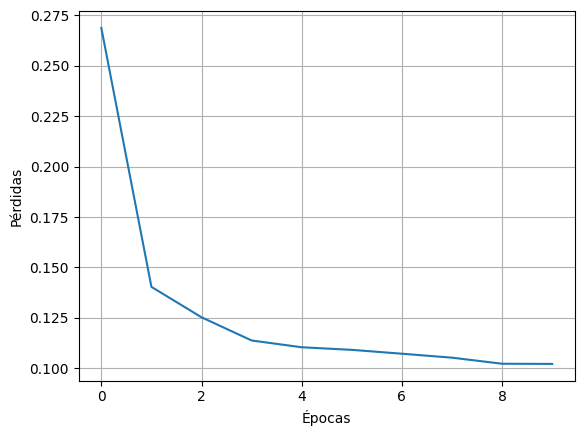

In [11]:
# convert the training history to a dataframe
history_df = pd.DataFrame(out.history)
# use Pandas native plot method
ax = history_df['loss'].plot();
ax.set(xlabel='Épocas', ylabel='Pérdidas'),plt.grid()
plt.show()

## Análisis del entrenamiento

Inicialmente se han construido dos bases de datos diferentes: un subconjunto para el entrenamiento y otro para la validación. El conjunto de validación se usa para medir la calidad de las salidas de la red cuando se le pasan datos nuevos, que no están en el conjunto de entrenamiento. Si la red funciona bien con estos datos, se dice que la red está **generalizando** bien. En otras palabras, la red ha sido capaz de extraer las relaciones entre los datos y el modelo ya no depende de los datos en cuestión. Las pérdidas obtenidas en el conjunto de entrenamiento se comparan con las del conjunto de validación en una gráfica denominada curva de aprendizaje. A partir del análisis de la curva de aprendizaje podemos detectar y solventar los dos problemas más típicos del entrenamiento: el *underfitting* y el *overfitting*.

### Interpretación de las curvas de aprendizaje

Es interesante pensar que los datos contienen dos componentes, una de señal (información) y otra de ruido. El ruido puede deberse a muchas causas y puede despistar al algoritmo de optimización. La parte correspondiente a la información es la que contiene las relaciones entre variables que definen la salida, por tanto permiten que la red aprenda a predecirla. Por otro lado, el ruido es aleatorio y toda la información que la red extraiga de él será errónea, ya que su comportamiento será diferente e impredecible cuando se consideren datos nuevos. El entrenamiento permite obtener los pesos que minimizan la función de pérdidas en el conjunto de datos de entrenamiento, sin embargo, una vez entrenado, el modelo verá datos nuevos cuando funcione en condiciones de predicción. Por esta razón, es interesante medir las pérdidas del modelo sobre un conjunto de datos que **no** se han utilizado para el entrenamiento: el conjunto de validación. De hecho, *Keras* mide automáticamente las pérdidas en el conjunto de validación en cada época y lo almacena en el registro histórico, de modo que se puede representar la evolución histórica de la función de pérdidas en el conjunto de entrenamiento y validación simultáneamente. Estas gráficas se denominan curvas de aprendizaje, un ejemplo se muestra en la siguiente figura:

<figure style="padding: 1em;"><center>
<img src="https://i.imgur.com/tHiVFnM.png" width="500" alt="">
<figcaption style="textalign: center; font-style: italic">Curvas de aprendizaje, las pérdidas en el conjunto de validación son el error que comete la red con los datos que no ha visto durante el entrenamiento, por tanto suele ser superior a las pérdidas en el conjunto de entrenamiento.
</center></figcaption>
</figure>

El error de entrenamiento se puede reducir por dos motivos: porque la red aprenda la componente de información o porque aprenda la componente de ruido. Sin embargo, las pérdidas en el conjunto de validación solo se reducen si la red aprende la señal, ya que el ruido no es el mismo que el del conjunto de entrenamiento. Cuando la red aprende únicamente la componente de información ambas curvas se reducen, pero si la red aprende el ruido las curvas se separan. La distancia entre las dos gráficas es una medida de la cantidad de ruido que la red ha aprendido. El modelo ideal es el que aprende toda la componente de señal y nada del ruido, pero en la práctica esto nunca sucede y es necesario llegar a un compromiso. Incluso, en ocasiones tenemos que asumir que se aprenda algo de ruido para poder aprender más señal. Si el balance neto entre aprender señal y aprender ruido es favorable a la señal, la gráfica de validación seguirá reduciéndose. Por el contrario, si la red aprende más ruido que señal el error de validación aumentará. En la práctica, es necesario llegar a un compromiso entre dos situaciones: o bien se ha aprendido poco, o bien se ha aprendido demasiado, lo cual quiere decir que se ha aprendido ruido. El caso en el cual se ha aprendido poco se denomina infra-ajuste, **Underfitting**, y las pérdidas (tanto de entrenamiento como validación) no son tan reducidas como podrían ser. El caso en el que se ha aprendido demasiado se denomina sobre-ajuste, **Overfitting**, y las pérdidas de validación no son tan reducidas como podrían ser, ya que el modelo ha aprendido demasiado ruido. El desafío en el entrenamiento consiste en encontrar el mejor balance posible entre los dos fenómenos. En la siguiente gráfica se muestran los resultados de las dos situaciones: en la gráfica de la izquierda la red no ha aprendido suficiente información, se produce  **Underfitting**, ya que los datos contienen una dependencia cuadrática y la red ha aprendido una dependencia lineal. En la gráfica de la derecha se produce **Overfitting** porque la red ha aprendido la estructura del ruido e intenta reproducirla.

<figure style="padding: 1em;"><center>
<img src="https://i.imgur.com/eUF6mfo.png" width="600" alt="">
<figcaption style="textalign: center; font-style: italic">Representación del fenómeno de **underfitting** y **overfitting**.
</center></figcaption>
</figure>

Existen diferentes técnicas para favorecer el aprendizaje de señal y reducir el aprendizaje del ruido, se llaman genéricamente técnicas de **regularización**.

### Capacidad

La **capacidad** de un modelo tiene que ver con su tamaño, que a su vez está relacionado con la capacidad de ajuste y con la complejidad de los patrones que es capaz de aprender en los datos. En el caso de las redes neuronales, la capacidad viene determinada por el número de neuronas y la estructura de las capas (tanto el número como el tipo de capas). Es interesante aumentar la capacidad cuando la red no es capaz de aprender toda la señal: se puede aumentar *anchura* de la red aumentando el número de neuronas en las capas o la *profundidad*, añadiendo más capas. Las redes más anchas aprenden mejor las relaciones lineales, mientras que las más profundas son mejores con las relaciones no lineales, ya que tienen más activaciones, que son funciones no lienales. Según la estructura de los datos, es más favorable una u otra estrategia. A continuación se muestran las dos opciones para aumentar la capacidad de un modelo: el aumento de la anchura y la profundidad.

``` python
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

### Parada temprana

Cuando un modelo está aprendiendo demasiado ruido, las pérdidas de validación suelen comenzar a aumentar durante el proceso de entrenamiento. Para evitar esto, podemos simplemente detener el entrenamiento cuando las pérdidas de validación han dejado de disminuir. Interrumpir el entrenamiento de esta manera se llama **parada temprana**, o **early stopping**. Una vez que las pérdidas de validación comienzan a aumentar, el proceso se interrumpe y los pesos se re-establecen en la situación del mínimo. Esto asegura que el modelo no continue aprendiendo el ruido, y por tanto, sobreajustando los datos.

<figure style="padding: 1em;"><center>
<img src="https://i.imgur.com/eP0gppr.png" width=500 alt="">
<figcaption style="textalign: center; font-style: italic"> Curvas de aprendizaje con parada temprana, en la izquierda del punto de parada existe *underfitting* y a la derecha hay *overfitting*.
</center></figcaption>
</figure>

Entrenar con **early stopping** también reduce el peligro de parar el entrenamiento demasiado pronto, antes de que la red haya terminado de aprender la componente de información. Así que, además de evitar el *sobreajuste* por entrenar demasiado tiempo, también evitamos el *infra-ajuste* por no entrenar lo suficiente. Esta técnica se configura aumentando mucho el número de épocas de entrenamiento y el proceso de **early stopping** interrumpe el entrenamiento cuando se cumplan unos requisitos predefinidos. En *Keras*, la parada temprana se incluye en el proceso de entrenamiento a través de un **callback**.  Un **callback** es simplemente una función que se ejecuta cada cierto tiempo mientras la red se entrena, en nuestro caso se ejecuta después de cada época. *Keras* tiene [una variedad de callbacks útiles](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) predefinidos, pero también se pueden definir [otros](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback). 

Examinemos el siguiente código:

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

La configuración anterior establece: "Si no ha habido al menos una mejora de $0.001$ en la pérdida de validación sobre las 20 épocas anteriores, entonces detenga el entrenamiento y restaure el mejor modelo encontrado". A veces puede ser difícil saber si las pérdidas de validación están aumentando debido al sobreajuste o simplemente debido a la variación aleatoria de cada `batch`. Por esa razón, se permite cierto margen a través de los parámetros `patience` y `min_delta`. Como veremos en el ejemplo siguiente, pasaremos este **callback** al método de entrenamiento `fit`, junto con la pérdida y el optimizador.

## Ejemplo

A continuación aumentamos la capacidad de la red, pero añadiremos un proceso de parada temprana para evitar el sobreajuste. En este caso, optamos por una red bastante grande, confiando en que el **callback** detenga el entrenamiento una vez que las pérdidas de validación muestren signos de sobreajuste.

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Después de definir el **callback** se añade como argumento en el método de entrenamiento `.fit` (podemos tener varios, así que se suele poner en una lista de **callbacks**). Cuando se utiliza la parada temprana se configura un gran número de épocas, confiando la parada en el **callback**.

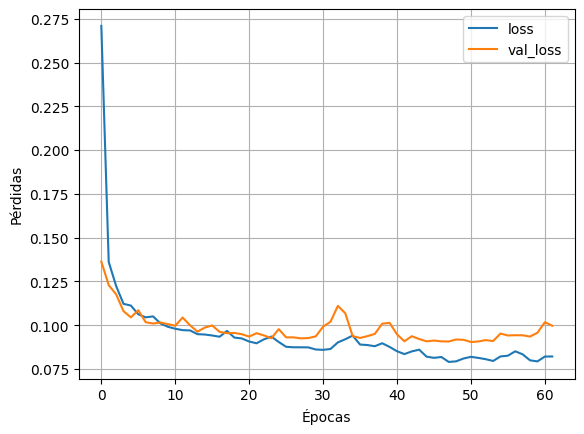

Minimum validation loss: 0.09043488651514053


In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
ax = history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set(xlabel='Épocas', ylabel='Pérdidas'),plt.grid()
plt.show()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Como se puede ver, el entrenamiento se ha detenido mucho antes de las 500 épocas predefinidas. Nótese que se ha obtenido un error (MAE) en la calificación del vino de 0.1!!!.